In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", None)

In [99]:
data_path = "../data/apod.csv"
data = pd.read_csv(data_path, index_col="date", parse_dates=True)

In [60]:
data.describe()

,copyright,explanation,media_type,title,url,hdurl
count,4189,6888,6888,6888,6878,6499
unique,2251,6767,3,5151,6801,6475
top,Martin Pugh,Massive stars in our Milky Way Galaxy live spe...,image,The Horsehead Nebula,https://www.youtube.com/embed/OfM7VlonD5c?rel=0,https://apod.nasa.gov/apod/image/0909/Swift_M3...
freq,54,3,6499,10,4,2


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6888 entries, 2018-01-01 to 2025-12-23
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   copyright    4189 non-null   object
 1   explanation  6888 non-null   object
 2   media_type   6888 non-null   object
 3   title        6888 non-null   object
 4   url          6878 non-null   object
 5   hdurl        6499 non-null   object
dtypes: object(6)
memory usage: 376.7+ KB


In [63]:
dup_count = data.duplicated(subset=['title']).sum()
print(f"Num Duplicated Images: {dup_count}")

Num Duplicated Images: 1737


In [95]:
grouped_by_title = data.groupby('url').size().reset_index(name="count").sort_values('count', ascending=False)
dup_titled = grouped_by_title[grouped_by_title['count'] > 1]
dup_titled

,url,count
6761,https://www.youtube.com/embed/sNUNB6CMnE8?rel=0,4
6649,https://www.youtube.com/embed/OfM7VlonD5c?rel=0,4
3905,https://apod.nasa.gov/apod/image/1803/AstroSoM/hudf.html,3
6651,https://www.youtube.com/embed/PBL1RBj-P1g?rel=0,3
6795,https://www.youtube.com/embed/zIqG42AD4Gw?rel=0,3
...,...,...
1943,https://apod.nasa.gov/apod/image/1205/snowtrees_bonfadini_960.jpg,2
38,https://apod.nasa.gov/apod/image/0510/hyperion2_cassini.jpg,2
6544,https://player.vimeo.com/video/67995158?title=0&portrait=0,2
6575,https://www.youtube.com/embed/5D9j-8Vhyto?rel=0&showinfo=0,2


In [97]:
data[data['url'] == 'https://www.youtube.com/embed/sNUNB6CMnE8?rel=0']['url']

date
2018-03-18    https://www.youtube.com/embed/sNUNB6CMnE8?rel=0
2020-07-19    https://www.youtube.com/embed/sNUNB6CMnE8?rel=0
2024-06-02    https://www.youtube.com/embed/sNUNB6CMnE8?rel=0
2025-10-04    https://www.youtube.com/embed/sNUNB6CMnE8?rel=0
Name: url, dtype: object

In [87]:
num_images = data[data['media_type'] == 'image'].shape[0]
print(f"Num Media Type is Image {num_images}")

Num Media Type is Image 6499


<Axes: xlabel='count', ylabel='media_type'>

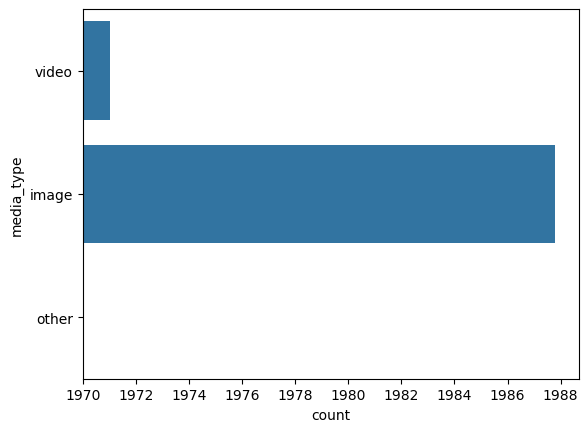

In [84]:
sns.countplot(data['media_type'])